In [1]:
import matplotlib.pyplot as plt
import json
import random

In [2]:
# New colormap including gridline color
colors = ['#000000','#1E93FF','#F93C31','#4FCC30','#FFDC00',
'#999999','#E53AA3','#FF851B','#87D8F1','#921231','#555555']
colormap = plt.matplotlib.colors.ListedColormap(colors)

augment_num = 10

In [3]:
base_path = './kaggle/input/arc-prize-2024/'
# Copied from the starter EDA notebook
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [4]:
training_challenges = load_json(base_path + 'arc-agi_training_challenges.json')
training_solutions = load_json(base_path + 'arc-agi_training_solutions.json')

In [5]:
# 랜덤 값을 생성하여 매핑할 딕셔너리
random_offsets = {}

def augment_value(val, augment_num=augment_num):
    if val not in random_offsets:
        # 새로운 값에 대해서만 랜덤 오프셋 생성 (조건 1과 조건 2를 만족)
        offset = random.randint(1, augment_num)  # 1~100 사이의 랜덤 값
        random_offsets[val] = val + offset
    return random_offsets[val]

def augment_nested_list(nested_list):
    """
    중첩된 리스트 안의 값을 증강 처리하는 함수.
    """
    return [[augment_value(val) for val in inner_list] for inner_list in nested_list]

# 기존 JSON 데이터에 랜덤한 값을 더하는 증강 처리
def augment_data(training_challenges):
    for key, value in training_challenges.items():
        print(f"Processing {key}")

        # 훈련 데이터 증강
        for i, train_case in enumerate(value['train']):
            train_case['input'] = augment_nested_list(train_case['input'])
            train_case['output'] = augment_nested_list(train_case['output'])
            #print(f"Train {key}: {i} input augmented: {train_case['input']}")
            #print(f"Train {key}: {i} output augmented: {train_case['output']}")


# 증강 처리 함수 호출
augment_data(training_challenges)


Processing 007bbfb7
Processing 00d62c1b
Processing 017c7c7b
Processing 025d127b
Processing 045e512c
Processing 0520fde7
Processing 05269061
Processing 05f2a901
Processing 06df4c85
Processing 08ed6ac7
Processing 09629e4f
Processing 0962bcdd
Processing 0a938d79
Processing 0b148d64
Processing 0ca9ddb6
Processing 0d3d703e
Processing 0dfd9992
Processing 0e206a2e
Processing 10fcaaa3
Processing 11852cab
Processing 1190e5a7
Processing 137eaa0f
Processing 150deff5
Processing 178fcbfb
Processing 1a07d186
Processing 1b2d62fb
Processing 1b60fb0c
Processing 1bfc4729
Processing 1c786137
Processing 1caeab9d
Processing 1cf80156
Processing 1e0a9b12
Processing 1e32b0e9
Processing 1f0c79e5
Processing 1f642eb9
Processing 1f85a75f
Processing 1f876c06
Processing 1fad071e
Processing 2013d3e2
Processing 2204b7a8
Processing 22168020
Processing 22233c11
Processing 2281f1f4
Processing 228f6490
Processing 22eb0ac0
Processing 234bbc79
Processing 23581191
Processing 239be575
Processing 23b5c85d
Processing 253bf280


In [6]:
# task_ids = []
# for key, value  in training_challenges.items():
#     task_ids.append(key)
    
#     print(value['test'][0]['input'])
#     for i , _ in enumerate(value['train']):
#         print(key,": " ,i)
#         print(value['train'][i]['input'])
#         print(value['train'][i]['output'])
    

In [7]:
# Change to display other examples from the training set
example_id = 'ff805c23'

In [8]:
# Get the grids out of the json maze and convert to tensors
toy_train_x = []
toy_train_y = []
for example in training_challenges[example_id]['train']:
    toy_train_x.append(example['input'])
    toy_train_y.append(example['output'])
toy_valid_x = training_challenges[example_id]['test'][0]['input']
toy_valid_y = training_solutions[example_id][0]

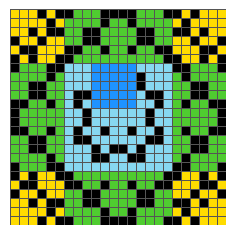

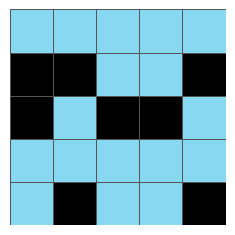

In [9]:
# Display a single grid
def show_grid(grid):
    fig = plt.figure(figsize=(2.8,2.8))
    ax = plt.gca()
    ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

show_grid(toy_valid_x)
show_grid(toy_valid_y)

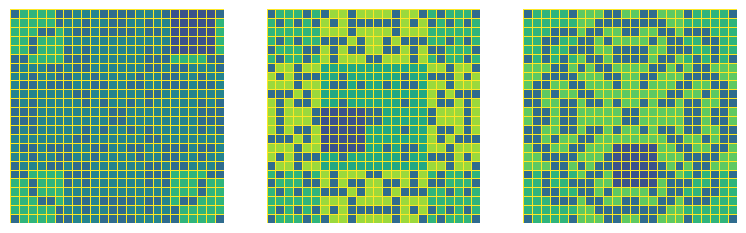

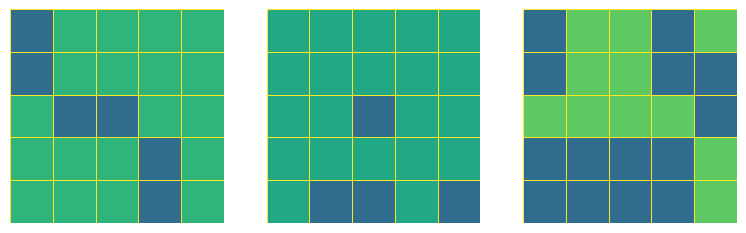

In [10]:
# Display an array of grids
colormap = 'viridis'
colors = plt.get_cmap(colormap).colors

def show_grids(grids):
    nrows, ncols = 1, max(5, len(grids))
    fig = plt.figure(figsize=(16,16))
    for i, grid in enumerate(grids):
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10+augment_num)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
    plt.show()

show_grids(toy_train_x)
show_grids(toy_train_y)